# Analysis

1) Fox News has the most negative sentiment, while CBS has the most positive.

2) The majority of tweets were neutral.

3) The Sources for the majority of the tweets were from two sources: SocialFlow, and Twitter Web Client.

In [2]:
import tweepy
import numpy as np
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import re
from config import consumer_key, consumer_secret, access_token, access_token_secret
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
output_data_file = "Output/tweets.csv"

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [88]:
target_users = ("BBC", "CBS", "CNN", "FoxNews", "nytimes")
sentiment_array = []
tweet_texts = []
tweettimes = []
tweet_source = []

for target in target_users:
    
    compound_lista = []
    positive_list = []
    negative_list = []
    neutral_list = []

    for x in range(5):
    
        public_tweets = api.user_timeline(target, page=x)
        
        for tweet in public_tweets:
        
            raw_time = tweet["created_at"]
            resultsa = analyzer.polarity_scores(tweet["text"])
            compounda = resultsa["compound"]
            posa = resultsa["pos"]
            nega = resultsa["neg"] 
            neua = resultsa["neu"]
            ttext = (tweet["text"])
            tsource = (tweet["source"])
            ttimes = (tweet["created_at"])

                       
            compound_lista.append(compounda)
            positive_list.append(posa)
            negative_list.append(nega)
            neutral_list.append(neua)

            sentiment_array.append({
                "User": target,
                "Compound": compounda,
                "Positive": posa,
                "Neutral": neua,
                "Negative": nega,
                "Text": ttext,
                "Source": tsource,
                "Date": ttimes
                            })

frame = pd.DataFrame(sentiment_array)
BBC_tweets = frame[frame["User"] == "BBC"]
BBC_list = BBC_tweets["Compound"]
BBC_mean = np.mean(BBC_list)
CBS_tweets = frame[frame["User"] == "CBS"]
CBS_list = CBS_tweets["Compound"]
CBS_mean = np.mean(CBS_list)
CNN_tweets = frame[frame["User"] == "CNN"]
CNN_list = CNN_tweets["Compound"]
CNN_mean = np.mean(CNN_list)
FoxNews_tweets = frame[frame["User"] == "FoxNews"]
FoxNews_list = FoxNews_tweets["Compound"]
FoxNews_mean = np.mean(FoxNews_list)
nytimes_tweets = frame[frame["User"] == "nytimes"]
nytimes_list = nytimes_tweets["Compound"]
nytimes_mean = np.mean(nytimes_list)

In [89]:
Objects  = []
for x in range(len(tweet_times)):

    y = x
    
    Objects.append(y)

100

In [80]:
averages = (BBC_mean, CBS_mean, CNN_mean, FoxNews_mean, nytimes_mean)
frame

,Compound,Date,Negative,Neutral,Positive,Source,Text,User
0,-0.3818,Mon Mar 19 19:33:04 +0000 2018,0.110,0.890,0.000,"<a href=""http://www.radian6.com"" rel=""nofollow...",Follow the dramatic and deadly series of event...,BBC
1,0.1531,Mon Mar 19 18:33:05 +0000 2018,0.116,0.709,0.175,"<a href=""http://www.radian6.com"" rel=""nofollow...",Leonardo DiCaprio stars in the true story of a...,BBC
2,-0.1027,Mon Mar 19 18:03:01 +0000 2018,0.080,0.920,0.000,"<a href=""http://www.radian6.com"" rel=""nofollow...",😂📸 @AlanCarr learned the hard way that you onl...,BBC
3,0.0000,Mon Mar 19 17:30:08 +0000 2018,0.000,1.000,0.000,"<a href=""http://www.radian6.com"" rel=""nofollow...",🎤Pop band @FifthHarmony have announced they're...,BBC
4,-0.7096,Mon Mar 19 17:00:05 +0000 2018,0.414,0.442,0.144,"<a href=""http://www.radian6.com"" rel=""nofollow...",Murder. Innocence. Lies. \n\n@AgathaChristie c...,BBC
5,0.0000,Mon Mar 19 16:33:29 +0000 2018,0.000,1.000,0.000,"<a href=""http://www.radian6.com"" rel=""nofollow...",Here are the latest snow scenes from around th...,BBC
6,0.0000,Mon Mar 19 15:02:02 +0000 2018,0.000,1.000,0.000,"<a href=""http://www.radian6.com"" rel=""nofollow...",'Flabbergasted'. 🎶This is the incredible momen...,BBC
7,0.0000,Mon Mar 19 14:30:08 +0000 2018,0.000,1.000,0.000,"<a href=""http://www.radian6.com"" rel=""nofollow...",Meet the dancing slum kids tipped for stardom ...,BBC
8,0.6588,Mon Mar 19 13:44:55 +0000 2018,0.000,0.788,0.212,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @bbcgetinspired: The Nation's Billion Steps...,BBC
9,-0.3412,Mon Mar 19 13:03:04 +0000 2018,0.112,0.888,0.000,"<a href=""http://www.radian6.com"" rel=""nofollow...","💭 ""There's always that voice in the back of yo...",BBC


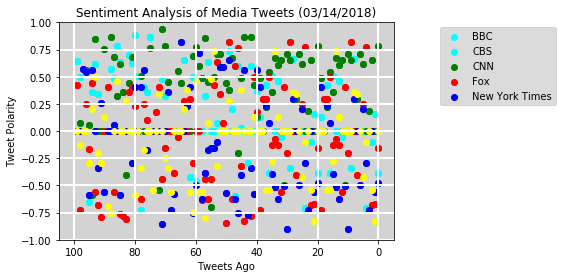

In [90]:
plt.scatter(Objects,
           BBC_list,
           c="cyan")
plt.scatter(Objects,
           CBS_list,
           c="green")
plt.scatter(Objects,
           CNN_list,
           c="red")
plt.scatter(Objects,
           FoxNews_list,
           c="blue")
plt.scatter(Objects,
           nytimes_list,
           c="yellow")

plt.xlim(105,-5,-1)   
plt.ylim(-1,1,-.5)
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.title("Sentiment Analysis of Media Tweets (03/14/2018)")
plt.grid(color='w', linestyle='-', linewidth=2)
plt.rcParams['axes.facecolor'] = 'lightgrey'
plt.legend(('BBC', 'CBS', 'CNN', 'Fox', 'New York Times'),
           loc='upper right', bbox_to_anchor=(1.5, 1))

plt.show()

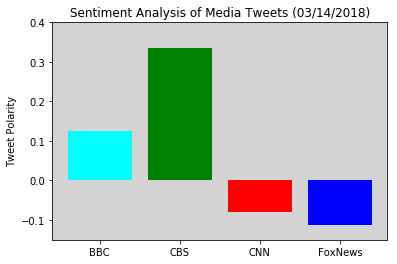

In [91]:
plt.bar(target_users, averages, color=['cyan', 'green', 'red', 'blue', 'yellow'])     
plt.ylim(-.15,.4,-.05)
plt.ylabel("Tweet Polarity")
plt.title("Sentiment Analysis of Media Tweets (03/14/2018)")


plt.show()

In [24]:
frame.to_csv(output_data_file, index_label="Tweet")